# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Set empty lists for data collection
name = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
city_num = 1

# Loop through cities and record data for available ones
print('''Beginning Data Retrieval
-----------------------------
''')

for city in cities:
    try:
        response = requests.get(query_url + city).json()

        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing city {city_num} | {city}")
        city_num += 1
        
    except KeyError:
        print('City not found. Skipping...')
        
print('''
-----------------------------
Data Retrieval Complete      
-----------------------------
''')        

Beginning Data Retrieval
-----------------------------

Processing city 1 | northam
Processing city 2 | port macquarie
Processing city 3 | ushuaia
City not found. Skipping...
Processing city 4 | kapaa
Processing city 5 | cape town
Processing city 6 | gat
Processing city 7 | saint-francois
Processing city 8 | punta arenas
City not found. Skipping...
Processing city 9 | antofagasta
Processing city 10 | saint-philippe
Processing city 11 | jamestown
Processing city 12 | albany
Processing city 13 | ixtapa
Processing city 14 | tiksi
Processing city 15 | ribeira grande
Processing city 16 | hilo
Processing city 17 | vaini
Processing city 18 | pyay
Processing city 19 | puerto ayora
Processing city 20 | yellowknife
Processing city 21 | kovdor
Processing city 22 | sinnamary
Processing city 23 | port alfred
City not found. Skipping...
Processing city 24 | inirida
Processing city 25 | preston
Processing city 26 | sao filipe
Processing city 27 | rikitea
Processing city 28 | bluff
Processing city 29 

Processing city 243 | dehloran
Processing city 244 | fuzhou
Processing city 245 | bandarbeyla
Processing city 246 | san pedro
Processing city 247 | rocha
Processing city 248 | markova
Processing city 249 | eydhafushi
Processing city 250 | wagar
Processing city 251 | villa carlos paz
Processing city 252 | puerto escondido
Processing city 253 | saint-leu
Processing city 254 | fort oglethorpe
City not found. Skipping...
Processing city 255 | port elizabeth
Processing city 256 | husavik
Processing city 257 | rio grande
Processing city 258 | rockland
Processing city 259 | egvekinot
City not found. Skipping...
Processing city 260 | vostok
Processing city 261 | sarahan
Processing city 262 | kiev
Processing city 263 | kurdzhinovo
Processing city 264 | vung tau
City not found. Skipping...
Processing city 265 | artigas
Processing city 266 | iralaya
Processing city 267 | komatipoort
Processing city 268 | great falls
Processing city 269 | bonfim
Processing city 270 | rapid valley
Processing city 2

Processing city 495 | presidencia roque saenz pena
Processing city 496 | imeni poliny osipenko
Processing city 497 | jaque
Processing city 498 | sjenica
Processing city 499 | port blair
Processing city 500 | guasdualito
Processing city 501 | evensk
Processing city 502 | mishan
City not found. Skipping...
Processing city 503 | kaka
Processing city 504 | canavieiras
Processing city 505 | karachi
Processing city 506 | cherskiy
Processing city 507 | ostrovnoy
Processing city 508 | truro
Processing city 509 | hanzhong
Processing city 510 | montes altos
Processing city 511 | ternate
Processing city 512 | leningradskiy
Processing city 513 | berezanka
Processing city 514 | padilla
Processing city 515 | clyde river
Processing city 516 | shenjiamen
Processing city 517 | divnomorskoye
Processing city 518 | alexandria
Processing city 519 | honggang
Processing city 520 | dudinka
Processing city 521 | darapidap
Processing city 522 | bah
Processing city 523 | mezokeresztes
Processing city 524 | barme

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Turn data into dict
city_data = {
    'City': name,
    'Lat': lat,
    'Lng': lon,
    'Max Temp (F)': temp_max,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

# Create df
city_df = pd.DataFrame(city_data)

# Export data into csv
city_df.to_csv(output_data_file)

In [7]:
# Preview df
city_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,Northam,51.0333,-4.2167,61.61,94,100,8.75,GB,1666215251
1,Port Macquarie,-31.4333,152.9167,64.89,100,100,5.75,AU,1666215093
2,Ushuaia,-54.8000,-68.3000,40.66,87,75,24.16,AR,1666215132
3,Kapaa,22.0752,-159.3190,76.98,86,100,14.97,US,1666215074
4,Cape Town,-33.9258,18.4232,64.81,72,75,10.36,ZA,1666214987


In [8]:
city_stats = city_df.describe()
city_stats

,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,21.809169,17.880461,59.925276,72.420690,58.760345,8.581052,1.666215e+09
std,33.415196,90.542056,19.610847,20.876698,39.136087,6.064918,1.064943e+02
min,-54.800000,-179.166700,-8.790000,3.000000,0.000000,0.000000,1.666215e+09
25%,-4.997325,-63.786725,46.455000,62.000000,20.000000,4.000000,1.666215e+09
50%,27.763100,25.015550,63.995000,78.000000,74.000000,7.160000,1.666215e+09
75%,50.132525,95.444650,75.840000,88.000000,99.000000,11.500000,1.666215e+09
max,78.218600,179.316700,97.520000,100.000000,100.000000,38.880000,1.666215e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Check if there are any cities with a humidity > 100%
city_df.loc[city_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
# No cities come up, so this step is being skipped

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

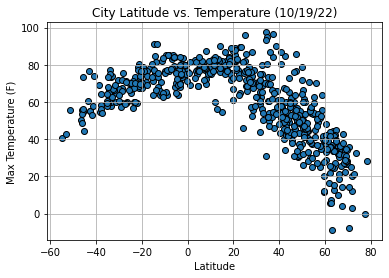

In [46]:
x_axis = city_df['Lat']
y_axis = city_df['Max Temp (F)']
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Temperature (10/19/22)')
plt.grid(visible=True)
plt.savefig('output_data/Lat_vs_Temp.png', facecolor='white')

## Latitude vs. Humidity Plot

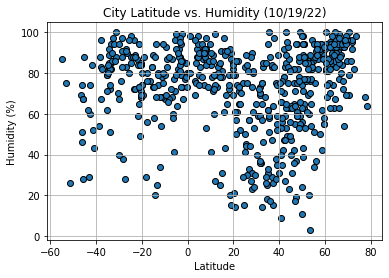

In [19]:
x_axis = city_df['Lat']
y_axis = city_df['Humidity']
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/19/22)')
plt.grid(visible=True)
plt.savefig('output_data/Lat_vs_Humidity.png')

## Latitude vs. Cloudiness Plot

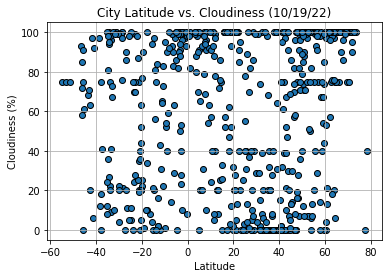

In [20]:
x_axis = city_df['Lat']
y_axis = city_df['Cloudiness']
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/19/22)')
plt.grid(visible=True)
plt.savefig('output_data/Lat_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

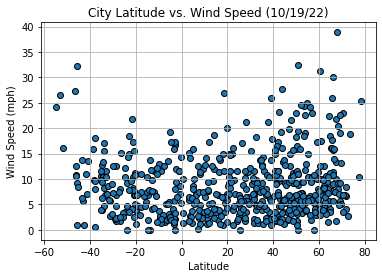

In [21]:
x_axis = city_df['Lat']
y_axis = city_df['Wind Speed']
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/19/22)')
plt.grid(visible=True)
plt.savefig('output_data/Lat_vs_Wind.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8210420965187278


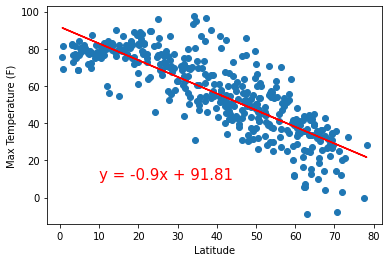

In [22]:
# Set up new df for just Northern Hemisphere cities
north_df = city_df.loc[city_df['Lat'] >= 0]

# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Max Temp (F)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = north_df['Lat']
y_axis = north_df['Max Temp (F)']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.695420673398356


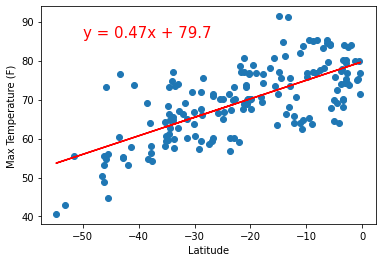

In [24]:
# Set up new df for just Southern Hemisphere cities
south_df = city_df.loc[city_df['Lat'] < 0]

# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Max Temp (F)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = south_df['Lat']
y_axis = south_df['Max Temp (F)']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,86),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13984147434214025


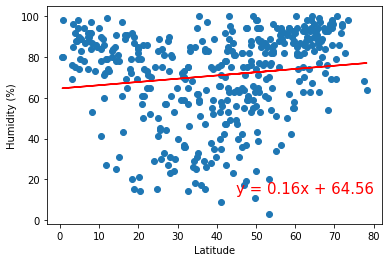

In [27]:
# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Humidity'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = north_df['Lat']
y_axis = north_df['Humidity']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1624891126401059


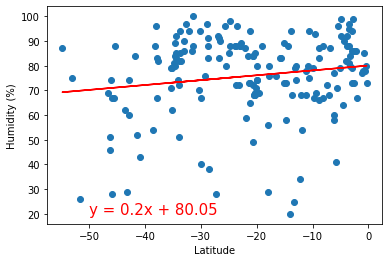

In [29]:
# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Humidity'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = south_df['Lat']
y_axis = south_df['Humidity']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19201038104071788


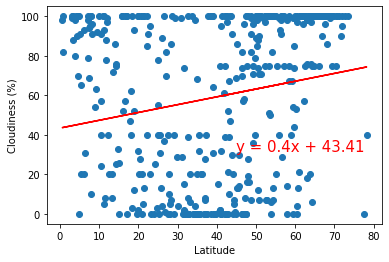

In [33]:
# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Cloudiness'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = north_df['Lat']
y_axis = north_df['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,32),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07552647470975384


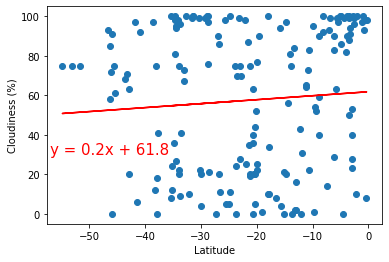

In [40]:
# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Cloudiness'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = south_df['Lat']
y_axis = south_df['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.22095034795464688


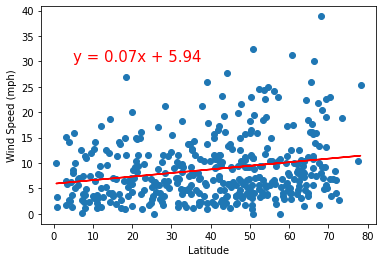

In [42]:
# Create linear regression
x_values = north_df.groupby('City')['Lat'].mean()
y_values = north_df.groupby('City')['Wind Speed'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = north_df['Lat']
y_axis = north_df['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3133281797462924


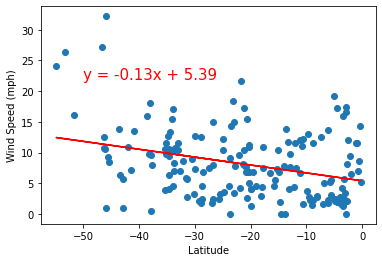

In [45]:
# Create linear regression
x_values = south_df.groupby('City')['Lat'].mean()
y_values = south_df.groupby('City')['Wind Speed'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation and print r-value
regress_values = x_values * slope + intercept

print(f"The r-value is: {rvalue}")

# Create string of equation to put on graph
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot graph with regression
x_axis = south_df['Lat']
y_axis = south_df['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()